# dataset extraction from huggingface library

In [1]:
import pandas as pd
from datasets import get_dataset_config_names

In [2]:
# For visualizations
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import nltk
#this will download nltk in your $HOME/nltk_data directory
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/sharathhagaranur/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/sharathhagaranur/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/sharathhagaranur/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/sharathhagaranur/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/sharathhagaranur/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_

KeyboardInterrupt: 

In [3]:
from datasets import get_dataset_config_names

In [4]:
# https://huggingface.co/datasets/pile-of-law/pile-of-law

dataset_name = "pile-of-law/pile-of-law"
data = get_dataset_config_names(dataset_name)
len(data)

35

In [5]:
data

['all',
 'r_legaladvice',
 'courtlistener_docket_entry_documents',
 'atticus_contracts',
 'courtlistener_opinions',
 'federal_register',
 'bva_opinions',
 'us_bills',
 'cc_casebooks',
 'tos',
 'euro_parl',
 'nlrb_decisions',
 'scotus_oral_arguments',
 'cfr',
 'state_codes',
 'scotus_filings',
 'bar_exam_outlines',
 'edgar',
 'cfpb_creditcard_contracts',
 'constitutions',
 'congressional_hearings',
 'oig',
 'olc_memos',
 'uscode',
 'founding_docs',
 'ftc_advisory_opinions',
 'echr',
 'eurlex',
 'tax_rulings',
 'un_debates',
 'fre',
 'frcp',
 'canadian_decisions',
 'eoir',
 'dol_ecab']

In [6]:
from datasets import load_dataset

scotus_oral_arguments = load_dataset(path=dataset_name, name='scotus_oral_arguments')
scotus_oral_arguments

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset pile-of-law downloaded and prepared to /Users/sharathhagaranur/.cache/huggingface/datasets/pile-of-law___pile-of-law/scotus_oral_arguments/0.0.0/acacf3e29a952ba9026148b979cb438151ebd33f842f5779a213967033c88619. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'created_timestamp', 'downloaded_timestamp', 'url'],
        num_rows: 5997
    })
    validation: Dataset({
        features: ['text', 'created_timestamp', 'downloaded_timestamp', 'url'],
        num_rows: 1999
    })
})

In [9]:
train_ds = scotus_oral_arguments["train"]
train_ds

Dataset({
    features: ['text', 'created_timestamp', 'downloaded_timestamp', 'url'],
    num_rows: 5997
})

In [13]:
train_ds[0]['text']

'Warren E. Burger: We will hear arguments next in McElroy against the United States. Mr. White, I think you may proceed whenever you are ready.\nThomas S. White: Chief Justice Burger, may it please the Court, this case involves the question of statutory construction of the third paragraph of Section 2314. That statute provides in its pertinent part "Whoever with unlawful or fraudulent intent transports in interstate or foreign commerce any falsely made, forged, altered, or counterfeited securities, knowing the same to have been falsely made, forged, altered, or counterfeited, shall be fined not more than $10,000 or imprisoned not more than ten years or both. " It is the petitioner\'s position here that in order for the United States to sustain a valid conviction under this section of the statute, and under this particular paragraph, it is necessary that they prove beyond a reasonable doubt that the check or checks that were here involved in this case be in a forged or altered condition

In [11]:
document=train_ds[0]['text']

# number of sentences in a document

In [12]:
sentences= nltk.sent_tokenize(document)
number_of_sentences= len(sentences)
number_of_sentences

326

# number of words in a document

In [14]:
words = document.split()
len(words)


7035

In [15]:
import string
document=document.translate(str.maketrans('','',string.punctuation))
document

'Warren E Burger We will hear arguments next in McElroy against the United States Mr White I think you may proceed whenever you are ready\nThomas S White Chief Justice Burger may it please the Court this case involves the question of statutory construction of the third paragraph of Section 2314 That statute provides in its pertinent part Whoever with unlawful or fraudulent intent transports in interstate or foreign commerce any falsely made forged altered or counterfeited securities knowing the same to have been falsely made forged altered or counterfeited shall be fined not more than 10000 or imprisoned not more than ten years or both  It is the petitioners position here that in order for the United States to sustain a valid conviction under this section of the statute and under this particular paragraph it is necessary that they prove beyond a reasonable doubt that the check or checks that were here involved in this case be in a forged or altered condition prior to their interstate t

In [16]:
import string
translation_table = str.maketrans('', '', string.digits)

#deletes all number
new_string = document.translate(translation_table)

print(new_string)

Warren E Burger We will hear arguments next in McElroy against the United States Mr White I think you may proceed whenever you are ready
Thomas S White Chief Justice Burger may it please the Court this case involves the question of statutory construction of the third paragraph of Section  That statute provides in its pertinent part Whoever with unlawful or fraudulent intent transports in interstate or foreign commerce any falsely made forged altered or counterfeited securities knowing the same to have been falsely made forged altered or counterfeited shall be fined not more than  or imprisoned not more than ten years or both  It is the petitioners position here that in order for the United States to sustain a valid conviction under this section of the statute and under this particular paragraph it is necessary that they prove beyond a reasonable doubt that the check or checks that were here involved in this case be in a forged or altered condition prior to their interstate transportati

In [17]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


# create a dictionary with word and its count in the complete corpus

In [18]:
#importing required libraries

from gensim.utils import simple_preprocess

from gensim import corpora

from smart_open import smart_open

import os



#tokenization
document_temp=[document]
tokens = [simple_preprocess(sentence, deacc=True) for sentence in document_temp]



#creating a dictionary

gensim_dictionary = corpora.Dictionary()



#creating a bag-of-words corpus

gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in tokens]



#displaying the contents in readable format

word_freq = [[(gensim_dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

print(word_freq)


[[('about', 13), ('abundantly', 1), ('accordance', 1), ('account', 1), ('acquittal', 1), ('across', 7), ('act', 21), ('activities', 1), ('activity', 2), ('acts', 1), ('actual', 2), ('adams', 2), ('additional', 1), ('adequately', 1), ('adjacent', 1), ('admit', 1), ('adopted', 2), ('affirm', 1), ('affirmed', 1), ('after', 6), ('again', 4), ('against', 4), ('agency', 3), ('agree', 2), ('agreed', 4), ('aider', 1), ('aiming', 1), ('aircraft', 1), ('all', 13), ('allens', 1), ('almost', 1), ('along', 3), ('already', 2), ('also', 4), ('alteration', 2), ('altered', 13), ('although', 1), ('am', 14), ('ambiguity', 1), ('ambiguous', 6), ('amended', 2), ('among', 2), ('an', 11), ('analysis', 1), ('and', 156), ('announced', 1), ('another', 6), ('any', 16), ('anybody', 1), ('anything', 6), ('appeal', 1), ('appeals', 9), ('appeared', 3), ('apply', 1), ('appropriate', 1), ('approximately', 2), ('are', 29), ('area', 4), ('arent', 1), ('argues', 1), ('argument', 7), ('arguments', 1), ('arriving', 1), ('a

In [19]:
import nltk
stop = nltk.corpus.stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
corpus=[]
new= new_string.split()
new
#new=new.tolist()

#corpus=[word for i in new for word in i]
corpus=new
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
corpus

['Warren',
 'E',
 'Burger',
 'We',
 'will',
 'hear',
 'arguments',
 'next',
 'in',
 'McElroy',
 'against',
 'the',
 'United',
 'States',
 'Mr',
 'White',
 'I',
 'think',
 'you',
 'may',
 'proceed',
 'whenever',
 'you',
 'are',
 'ready',
 'Thomas',
 'S',
 'White',
 'Chief',
 'Justice',
 'Burger',
 'may',
 'it',
 'please',
 'the',
 'Court',
 'this',
 'case',
 'involves',
 'the',
 'question',
 'of',
 'statutory',
 'construction',
 'of',
 'the',
 'third',
 'paragraph',
 'of',
 'Section',
 'That',
 'statute',
 'provides',
 'in',
 'its',
 'pertinent',
 'part',
 'Whoever',
 'with',
 'unlawful',
 'or',
 'fraudulent',
 'intent',
 'transports',
 'in',
 'interstate',
 'or',
 'foreign',
 'commerce',
 'any',
 'falsely',
 'made',
 'forged',
 'altered',
 'or',
 'counterfeited',
 'securities',
 'knowing',
 'the',
 'same',
 'to',
 'have',
 'been',
 'falsely',
 'made',
 'forged',
 'altered',
 'or',
 'counterfeited',
 'shall',
 'be',
 'fined',
 'not',
 'more',
 'than',
 'or',
 'imprisoned',
 'not',
 'mor

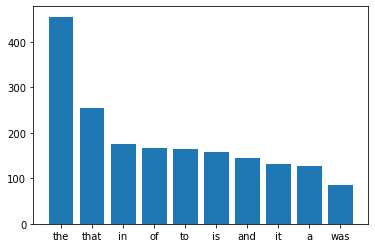

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    
    new= text.split()
    #new=text
    corpus=new
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(new_string)

# n gram exploration

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

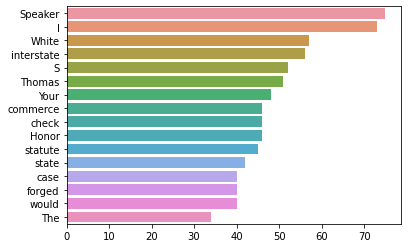

In [23]:
from collections import Counter
import seaborn as sns

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [24]:
from nltk.util import ngrams

In [25]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [26]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=c1da48403292486c18d4ad2bba457bdabe86dc163debdedc9dfa3bcece9be875
  Stored in directory: c:\users\temp.laptop-n7i9oceg.000.001\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


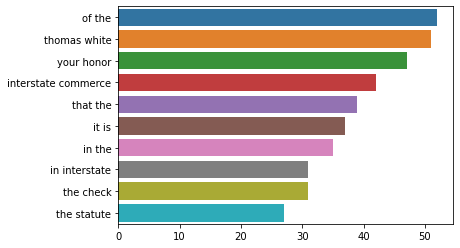

In [27]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.split()
    
    corpus=new

    def _get_top_ngram(corpus, n=None):
        corpus=[corpus]
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(new_string,2)


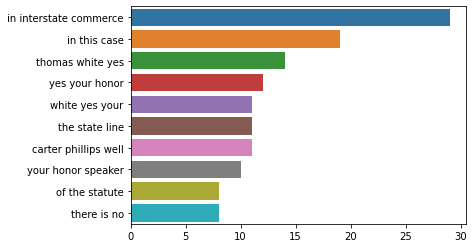

In [28]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.split()
    
    corpus=new

    def _get_top_ngram(corpus, n=None):
        corpus=[corpus]
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(new_string,3)


In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
corpus

['Warren',
 'E',
 'Burger',
 'We',
 'will',
 'hear',
 'arguments',
 'next',
 'in',
 'McElroy',
 'against',
 'the',
 'United',
 'States',
 'Mr',
 'White',
 'I',
 'think',
 'you',
 'may',
 'proceed',
 'whenever',
 'you',
 'are',
 'ready',
 'Thomas',
 'S',
 'White',
 'Chief',
 'Justice',
 'Burger',
 'may',
 'it',
 'please',
 'the',
 'Court',
 'this',
 'case',
 'involves',
 'the',
 'question',
 'of',
 'statutory',
 'construction',
 'of',
 'the',
 'third',
 'paragraph',
 'of',
 'Section',
 'That',
 'statute',
 'provides',
 'in',
 'its',
 'pertinent',
 'part',
 'Whoever',
 'with',
 'unlawful',
 'or',
 'fraudulent',
 'intent',
 'transports',
 'in',
 'interstate',
 'or',
 'foreign',
 'commerce',
 'any',
 'falsely',
 'made',
 'forged',
 'altered',
 'or',
 'counterfeited',
 'securities',
 'knowing',
 'the',
 'same',
 'to',
 'have',
 'been',
 'falsely',
 'made',
 'forged',
 'altered',
 'or',
 'counterfeited',
 'shall',
 'be',
 'fined',
 'not',
 'more',
 'than',
 'or',
 'imprisoned',
 'not',
 'mor

# create a word cloud (100 common words)

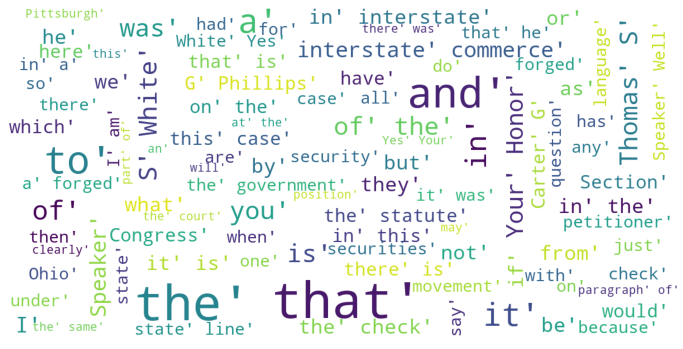

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)


# topic modelling

# create a  vocabulary of words present in the complete corpus

In [40]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    df=[df]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(new_string)
corpus

[nltk_data] Downloading package punkt to C:\Users\TEMP.LAPTOP-N7I9OCEG
[nltk_data]     .000.001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TEMP.LAPTOP-N7I9OC
[nltk_data]     EG.000.001\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'PorterStemmer' is not defined

In [41]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
bow_corpus

NameError: name 'gensim' is not defined

In [42]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

NameError: name 'gensim' is not defined

In [43]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

NameError: name 'pyLDAvis' is not defined